In [6]:
%config InlineBackend.figure_format = 'png'
%matplotlib inline

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from scipy import stats
import pylab 

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [8]:
train = pd.read_csv("treino.csv")

data_columns_names = ['matricula', 'vetorial','lpt','p1','ic','lp1','calculo2','discreta','p2','grafos','fis_classica','lp2','cra','calculo1']
train.columns = data_columns_names

In [9]:
train.head()

,matricula,vetorial,lpt,p1,ic,lp1,calculo2,discreta,p2,grafos,fis_classica,lp2,cra,calculo1
0,0cc3d63edf0b986cb87e345972857e15,8.6,10.0,9.0,9.1,8.6,8.4,8.3,8.8,8.2,7.9,9.4,8.477647,8.7
1,0d78246db769dc958ce19fc414050b2a,5.6,7.0,7.7,7.0,8.1,6.2,7.3,8.2,5.4,7.7,8.9,6.851724,7.0
2,0f5bb983df06b90337dc2c6301fef3f6,10.0,9.8,7.9,9.6,8.3,8.7,8.8,9.5,9.2,8.6,9.7,9.090588,8.6
3,1307a4421a67a497cea198e8ccfb97ee,6.1,8.3,6.8,8.2,7.1,8.0,6.3,8.9,7.0,8.5,9.0,7.283516,7.8
4,1432d50cf8519694ab992c414d90a130,8.8,9.3,5.0,8.5,5.1,5.0,5.8,7.1,5.4,8.7,8.2,7.205747,5.2


In [10]:
matricula = train["matricula"]
features = train.drop(["matricula"], axis=1)

## 1. Data preprocessing

### Checking for missing values in data 

To search for missing values we first apply a function that checks if each value of our data frame is a real number and return true for those who are and false otherwise. In a second moment, we count how Trues and Falses we obtained in the first function. The below table present the numbers and confirm that all values for all features are presented in our data, thus, it is not needed to treat missing values.

In [11]:
features.applymap(np.isreal).apply(pd.value_counts)

,vetorial,lpt,p1,ic,lp1,calculo2,discreta,p2,grafos,fis_classica,lp2,cra,calculo1
True,88,88,88,88,88,88,88,88,88,88,88,88,88


### Checking for skew in data

Using shapiro test, skewness and Q-Qplot

#### Shapiro normality test

In [12]:
features.apply(lambda x: stats.shapiro(x))

vetorial          (0.966356575489, 0.0218723528087)
lpt              (0.957782268524, 0.00592448469251)
p1                (0.947769165039, 0.0014158753911)
ic                 (0.987297177315, 0.551311731339)
lp1              (0.949837744236, 0.00188722135499)
calculo2        (0.867309808731, 2.33750995449e-07)
discreta         (0.955848455429, 0.00445785466582)
p2                (0.967263817787, 0.0252141393721)
grafos             (0.976828217506, 0.116014324129)
fis_classica    (0.892025470734, 2.26830047723e-06)
lp2             (0.806616425514, 2.19361440124e-09)
cra                (0.986866354942, 0.522131383419)
calculo1          (0.970496237278, 0.0420565418899)
dtype: object

#### Skewness

In [13]:
numeric_feats = features.dtypes[features.dtypes != "object"].index

skewness = features[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
print skewness

vetorial        0.100165
lpt            -0.311041
p1             -0.370812
ic             -0.077415
lp1            -0.327050
calculo2        0.530180
discreta        0.346941
p2             -0.445317
grafos          0.066885
fis_classica   -0.564424
lp2            -1.905429
cra            -0.108032
calculo1        0.027946
dtype: float64


#### Q-QPlot

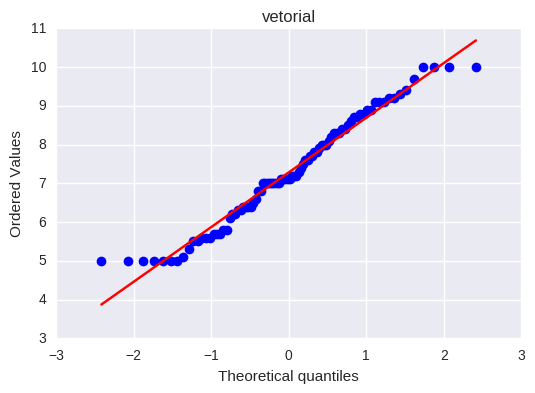

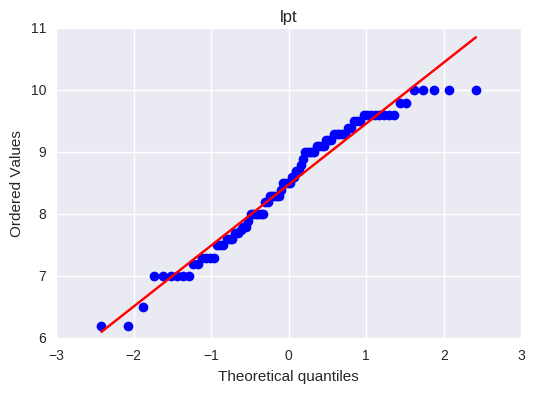

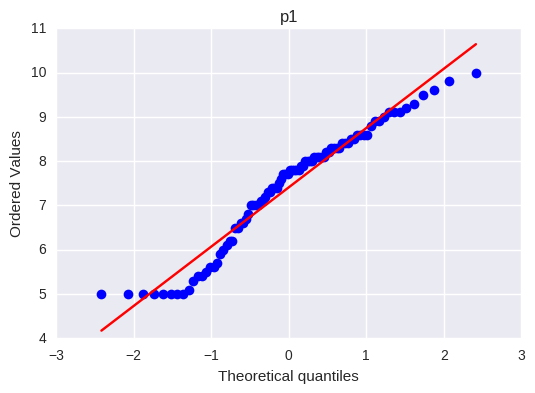

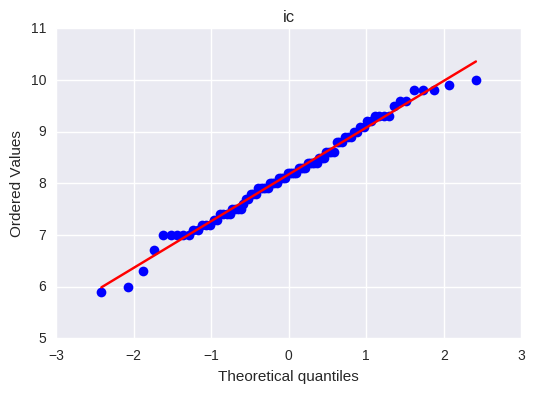

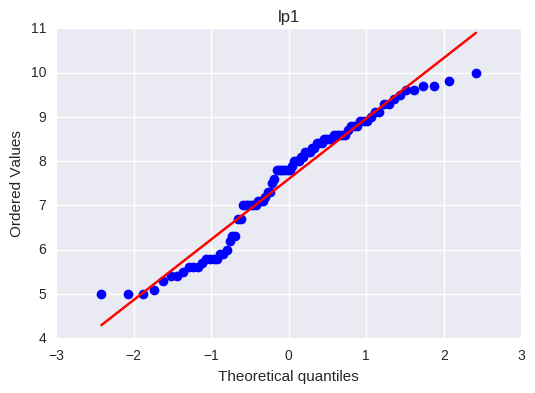

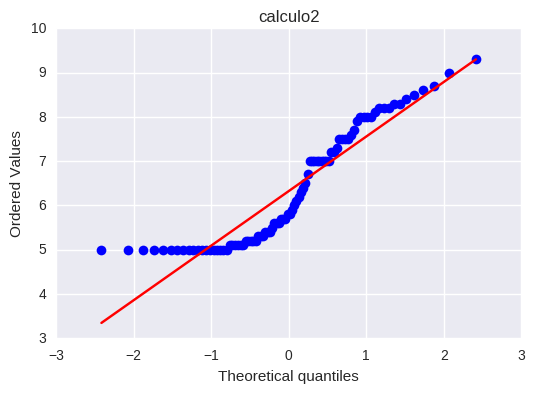

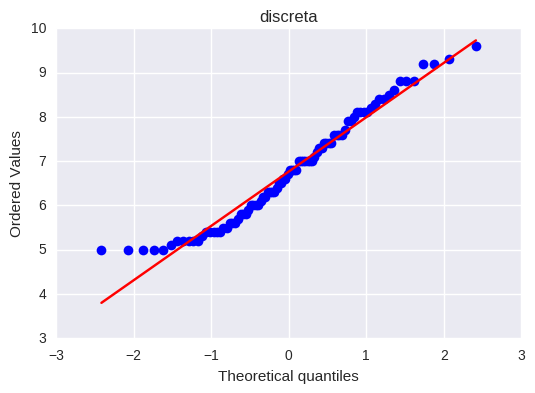

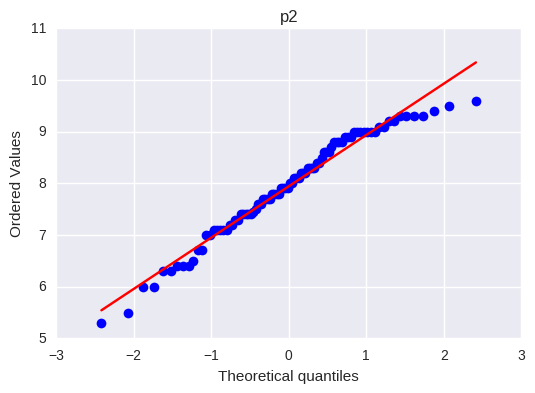

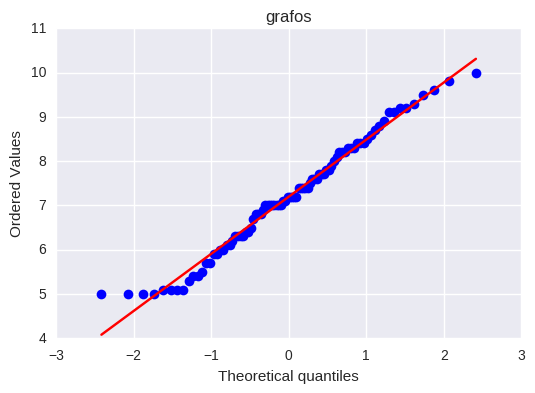

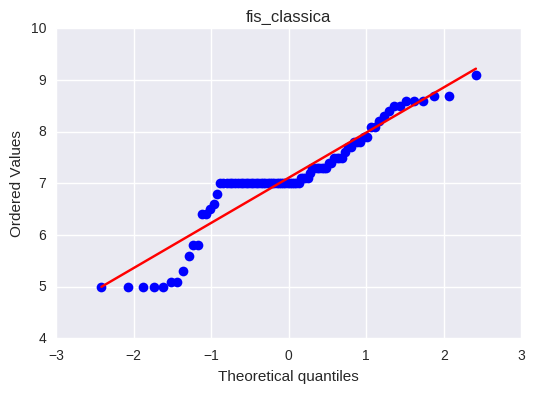

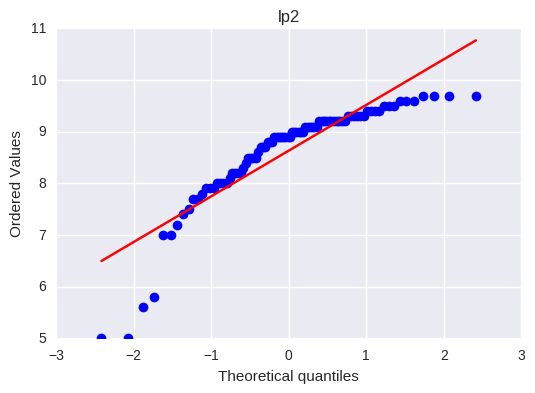

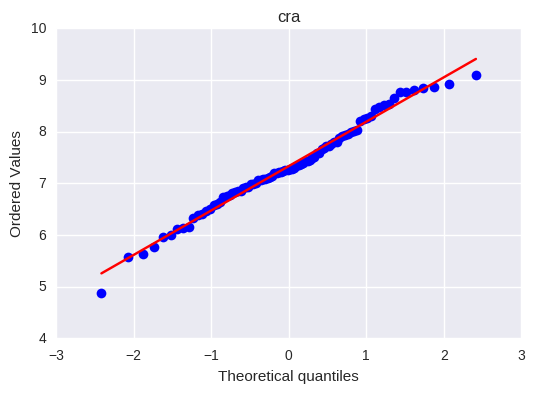

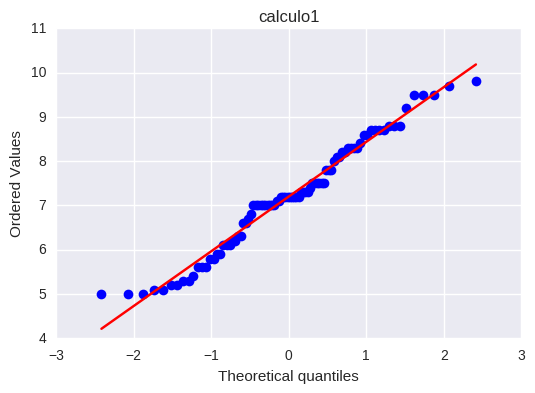

In [14]:
def show_qqplot(x, data):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    stats.probplot(data[x], dist="norm", plot=pylab)
    ax.set_title(x)
    pylab.show()
    
for name in features.columns:
    show_qqplot(name, features)

Through our analysis, we conclude that the only feature in the necessity of being transformed is LP2. We conclude it by:
   
    1) Checking for normality in data by knowing that normal data necessarily are not skewed;
    2) Verifying the skewness values for the features; and
    3) Looking at the QQ-Plot for each feature.


### Feature transformation

Now we ease the lp2's skew and show its new values and all metrics previously mentioned.

In [15]:
skewed_feats = skewness[skewness < -0.75]
skewed_feats = skewed_feats.index

features[skewed_feats] = np.exp2(features[skewed_feats])

In [16]:
features.head()

,vetorial,lpt,p1,ic,lp1,calculo2,discreta,p2,grafos,fis_classica,lp2,cra,calculo1
0,8.6,10.0,9.0,9.1,8.6,8.4,8.3,8.8,8.2,7.9,675.588050,8.477647,8.7
1,5.6,7.0,7.7,7.0,8.1,6.2,7.3,8.2,5.4,7.7,477.712892,6.851724,7.0
2,10.0,9.8,7.9,9.6,8.3,8.7,8.8,9.5,9.2,8.6,831.746454,9.090588,8.6
3,6.1,8.3,6.8,8.2,7.1,8.0,6.3,8.9,7.0,8.5,512.000000,7.283516,7.8
4,8.8,9.3,5.0,8.5,5.1,5.0,5.8,7.1,5.4,8.7,294.066779,7.205747,5.2


vetorial        0.100165
lpt            -0.311041
p1             -0.370812
ic             -0.077415
lp1            -0.327050
calculo2        0.530180
discreta        0.346941
p2             -0.445317
grafos          0.066885
fis_classica   -0.564424
lp2            -0.240387
cra            -0.108032
calculo1        0.027946
dtype: float64


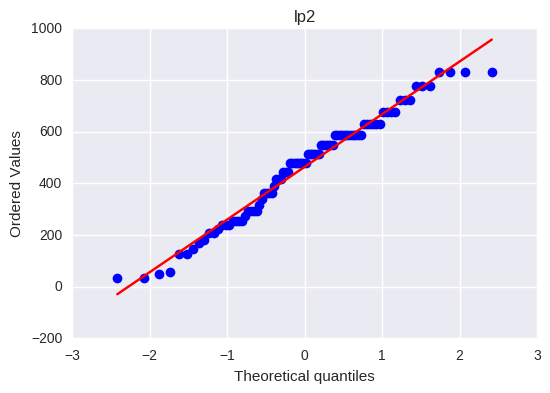

In [17]:
numeric_feats = features.dtypes[features.dtypes != "object"].index
print features[numeric_feats].apply(lambda x: skew(x.dropna()))

show_qqplot("lp2", features)

## 2. Ridge and LASSO Regression

In [18]:
y = features.cra
X_train = features.drop(["cra"], axis=1)

In [40]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV

from sklearn.model_selection import cross_val_score

def vector_norm(w):
    return np.sqrt(np.sum(w**2))

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

def coefficients_graphic(model, title):
    coef = pd.Series(model.coef_, index = X_train.columns)

    matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
    coef.plot(kind = "barh")
    plt.title(title)

def residuals_graph(model):
    matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

    preds = pd.DataFrame({"preds":model.predict(X_train), "true":y})
    preds["residuals"] = preds["true"] - preds["preds"]
    preds.plot(x = "preds", y = "residuals",kind = "scatter")
    
def cv_rmse_graph(cv_rmse, alpha_levels):       
    cv_rmse = pd.Series(cv_rmse, index = alpha_levels)
    cv_rmse.plot(title = "Validation - Just Do It")
    plt.xlabel("alpha")
    plt.ylabel("rmse")

### Ridge Regression

#### No regularization

In [20]:
clf = Ridge(alpha=0)
clf.fit(X_train, y)

vector_norm(clf.coef_)

0.3679610018157467

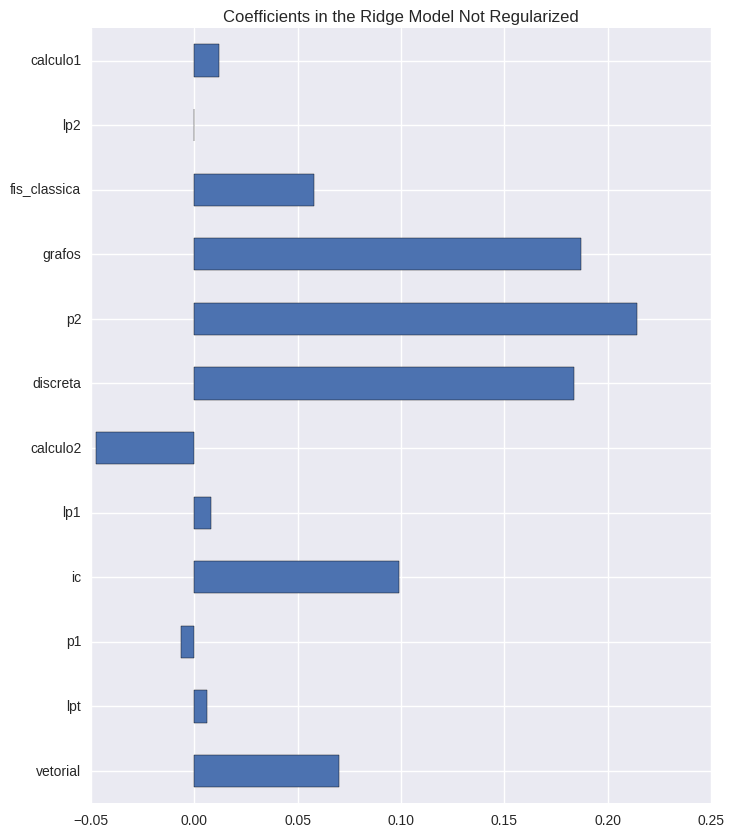

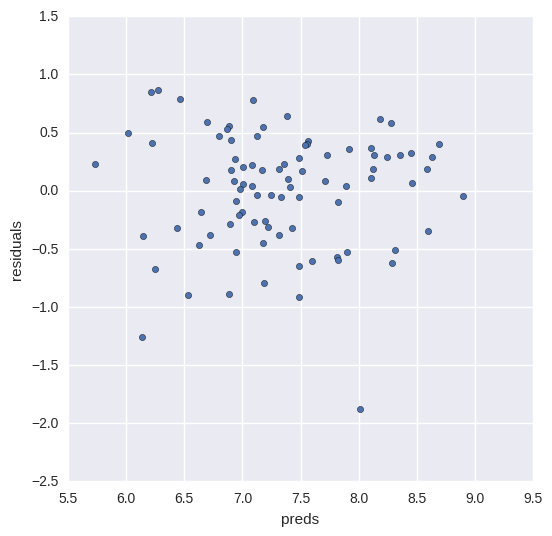

In [21]:
coefficients_graphic(clf, "Coefficients in the Ridge Model Not Regularized")

residuals_graph(clf)

#### Using Regularization

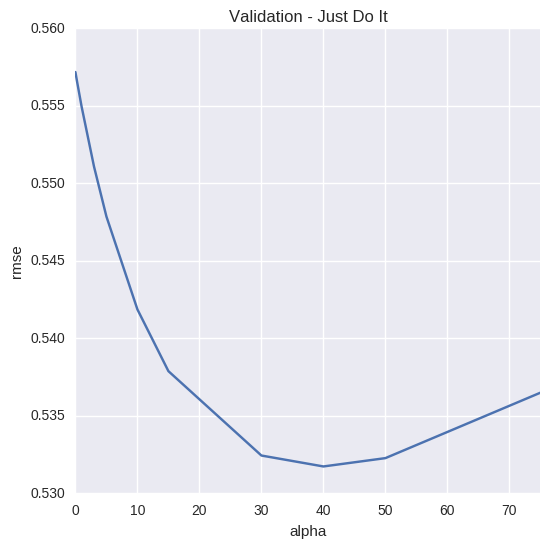

In [58]:
alphas = [0, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 40, 50, 75]

cv_rmse = [rmse_cv(Ridge(alpha = level)).mean() 
               for level in alphas]
cv_rmse_graph(cv_rmse, alphas)

In [23]:
clf = Ridge(alpha=40)
clf.fit(X_train, y)

vector_norm(clf.coef_)

0.28164857895245277

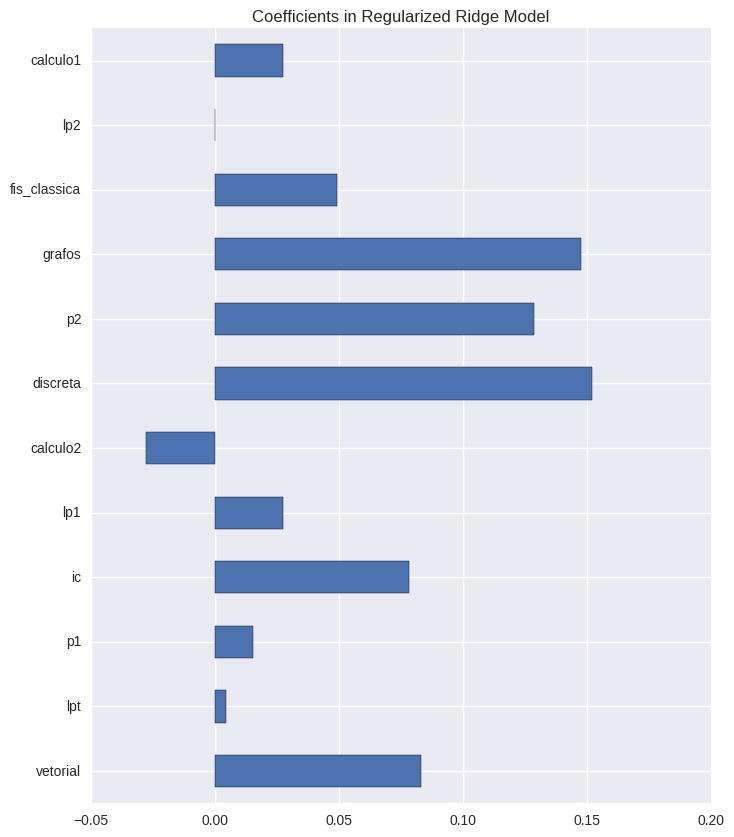

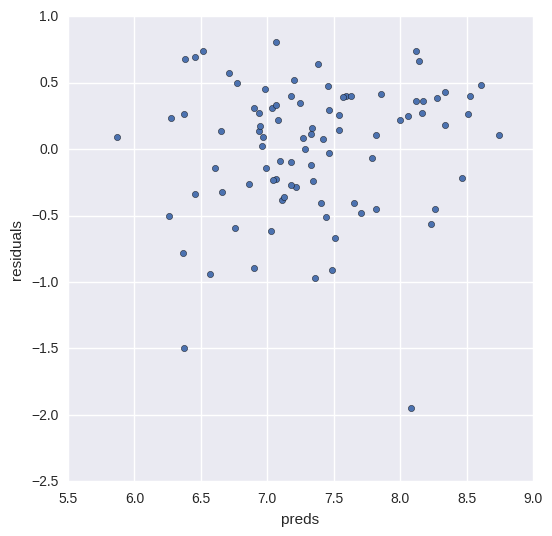

In [24]:
coefficients_graphic(clf, "Coefficients in Regularized Ridge Model")
residuals_graph(clf)

### LASSO Regression

#### No regularization

In [25]:
model_lasso = Lasso(alpha = [0]).fit(X_train, y)

/home/allan/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/home/allan/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [26]:
coef_lasso = pd.Series(model_lasso.coef_, index = X_train.columns)

In [27]:
print("Lasso picked " + str(sum(coef_lasso != 0)) + " variables and eliminated the other " +  str(sum(coef_lasso == 0)) + " variables")

Lasso picked 12 variables and eliminated the other 0 variables


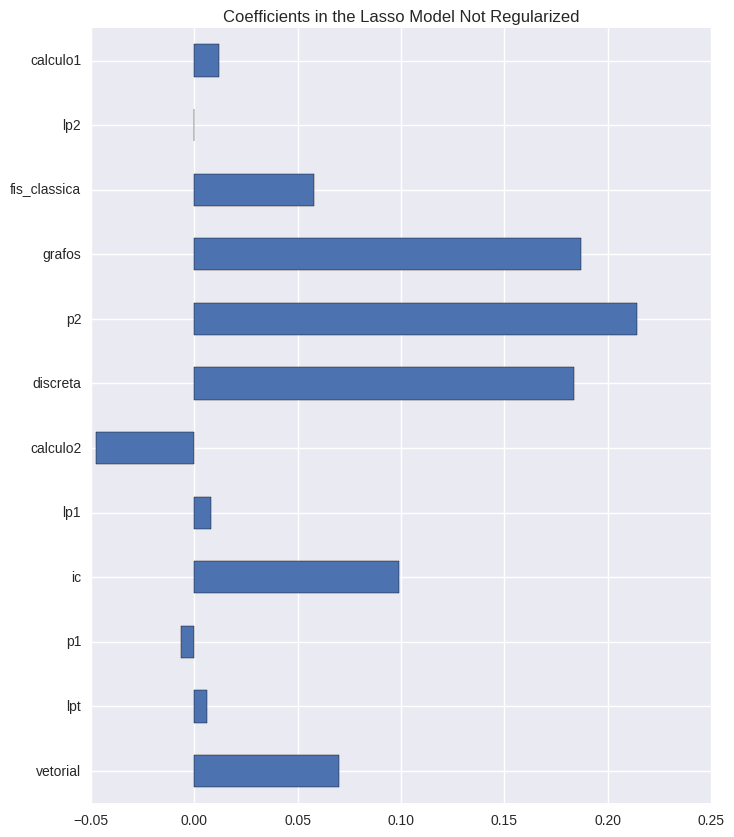

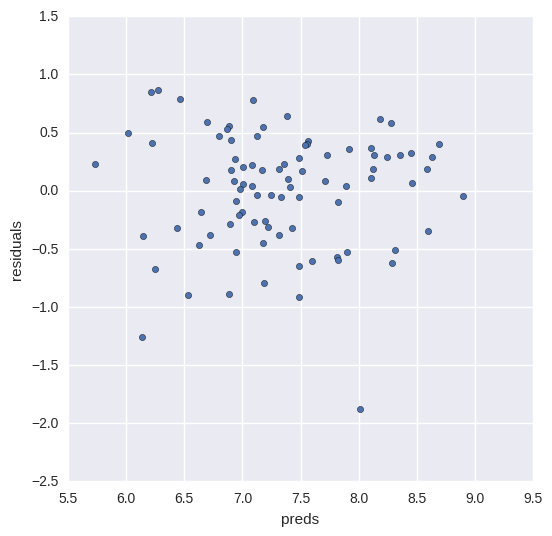

In [28]:
coefficients_graphic(model_lasso, "Coefficients in the Lasso Model Not Regularized")
residuals_graph(model_lasso)

#### Using regularization

/home/allan/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


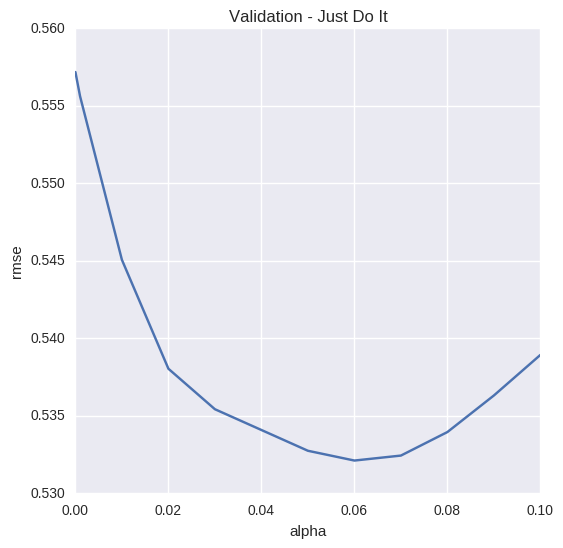

In [60]:
alphas = [0, 0.001, 0.01, 0.02, 0.03, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

cv_rmse = [rmse_cv(Lasso(alpha = level)).mean() 
               for level in alphas]
cv_rmse_graph(cv_rmse, alphas)

In [30]:
model_lasso = Lasso(alpha = 0.06).fit(X_train, y)

In [31]:
coef_lasso = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef_lasso != 0)) + " variables and eliminated the other " +  str(sum(coef_lasso == 0)) + " variables")

Lasso picked 6 variables and eliminated the other 6 variables


vetorial        0.069915
lpt             0.000000
p1              0.000000
ic              0.056440
lp1             0.000000
calculo2       -0.000000
discreta        0.179656
p2              0.149259
grafos          0.175489
fis_classica    0.000000
lp2             0.000150
calculo1        0.000000
dtype: float64


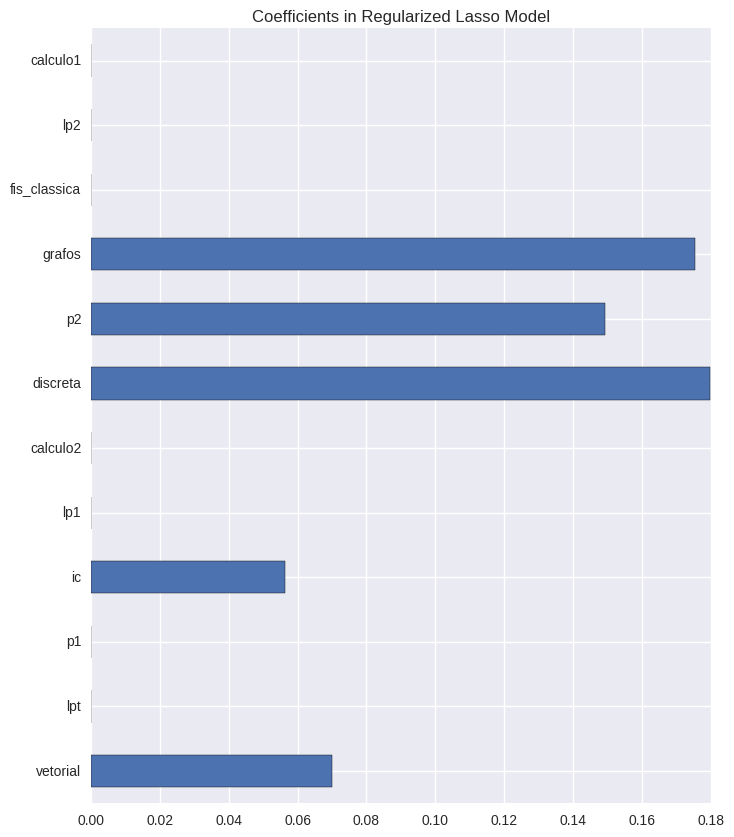

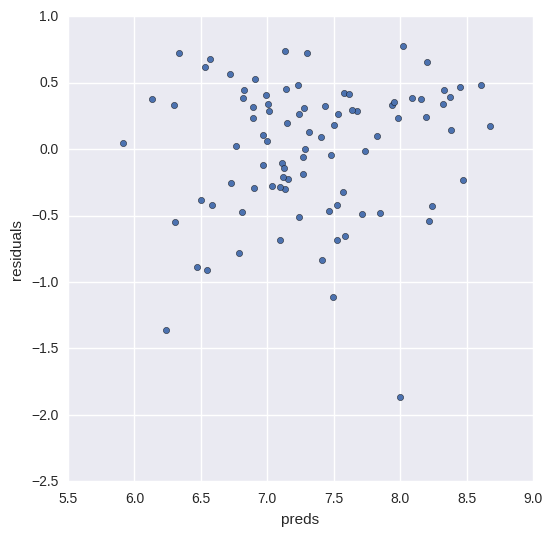

In [32]:
print coef_lasso

coefficients_graphic(model_lasso, "Coefficients in Regularized Lasso Model")
residuals_graph(model_lasso)

## 3. KNN and Kernel Regression

#### KNN

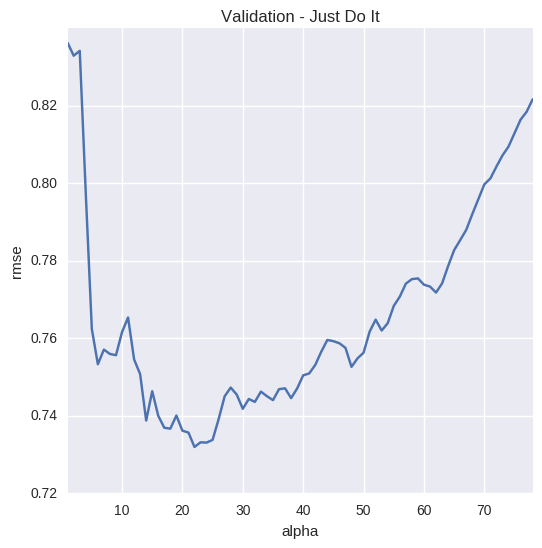

In [70]:
from sklearn.neighbors import KNeighborsRegressor


max_n_neighbors = int(y.shape[0] - 0.1*y.shape[0])
neighbors = range(1,max_n_neighbors)
cv_rmse = [rmse_cv(KNeighborsRegressor(n_neighbors = level)).mean() 
               for level in neighbors]
cv_rmse_graph(cv_rmse, neighbors)

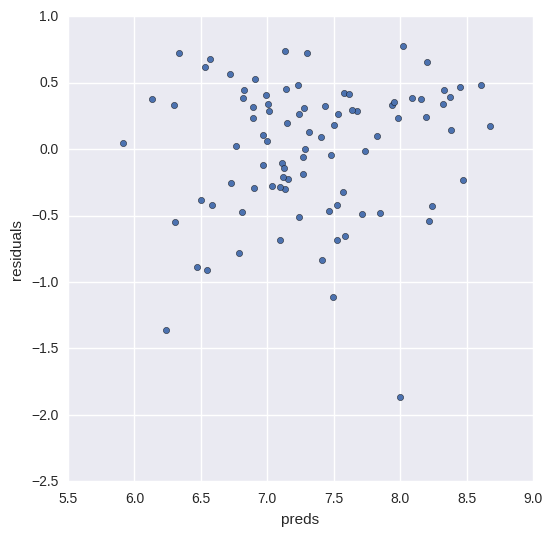

In [57]:
best_knn_fit = KNeighborsRegressor(n_neighbors = 22)
residuals_graph(model_lasso)

### Kernel Regression

In [93]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

bandwidth_level = [1, 5, 10, 15, 20, 40, 45, 50, 55, 60, 70, 80]

params = {'bandwidth': bandwidth_level}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(X_train)

kde = grid.best_estimator_